This cell imports the necessary libraries like pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reads the heart disease dataset (heart.csv) and displays the first few rows of the data.

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Prints the shape of the dataset, showing that it contains 1025 rows and 14 columns.

In [ ]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

Dataset contains 1025 rows and 14 columns


Displays the information about the dataset, including data types and non-null counts of each feature.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Provides summary statistics (mean, std, min, max) for the numeric columns in the dataset.

In [ ]:
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

Checks for missing values in the dataset, showing that there are none.

In [ ]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Shows the unique values for categorical columns like sex and cp.

Encodes categorical columns using one-hot encoding to prepare them for machine learning models.

In [ ]:
print(data['sex'].unique())
print(data['cp'].unique())
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
print(data.head())

[1 0]
[0 1 2 3]
   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target   cp_1  \
0   52    1       125   212    0      168      0      1.0   2       0  False   
1   53    1       140   203    1      155      1      3.1   0       0  False   
2   70    1       145   174    0      125      1      2.6   0       0  False   
3   61    1       148   203    0      161      0      0.0   1       0  False   
4   62    0       138   294    1      106      0      1.9   3       0  False   

    cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  \
0  False  False       True      False    False     True   False   False   
1  False  False      False      False    False    False   False   False   
2  False  False       True      False    False    False   False   False   
3  False  False       True      False    False     True   False   False   
4  False  False       True      False     True    False   False    True   

   thal_3  
0    True  
1    True  
2    True  
3   

Scales numerical features like age, chol, and trestbps using StandardScaler to normalize them.

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print(data.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0 -0.268437    1 -0.377636 -0.659332    0  0.821321      0 -0.060888   2   
1 -0.158157    1  0.479107 -0.833861    1  0.255968      1  1.727137   0   
2  1.716595    1  0.764688 -1.396233    0 -1.048692      1  1.301417   0   
3  0.724079    1  0.936037 -0.833861    0  0.516900      0 -0.912329   1   
4  0.834359    0  0.364875  0.930822    1 -1.874977      0  0.705408   3   

   target   cp_1   cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  \
0       0  False  False  False       True      False    False     True   
1       0  False  False  False      False      False    False    False   
2       0  False  False  False       True      False    False    False   
3       0  False  False  False       True      False    False     True   
4       0  False  False  False       True      False     True    False   

   thal_1  thal_2  thal_3  
0   False   False    True  
1   False   False    True  
2   False   Fa

Separates the features (X) and target variable (y) for model training.

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
print(x.shape, y.shape)

(1025, 19) (1025,)


Visualizes the distribution of heart disease presence (target variable) using a count plot.

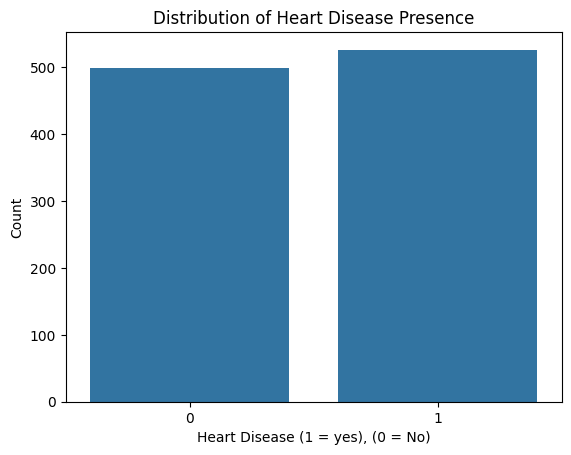

In [ ]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease (1 = yes), (0 = No)')
plt.ylabel('Count')
plt.show()

Plots the distribution of ages in the dataset using a histogram.

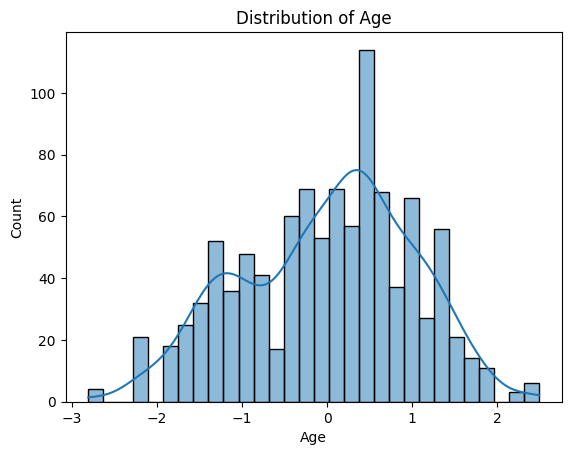

In [ ]:
sns.histplot(data['age'], kde=True, bins = 30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Plots the distribution of resting blood pressure (trestbps) using a histogram.

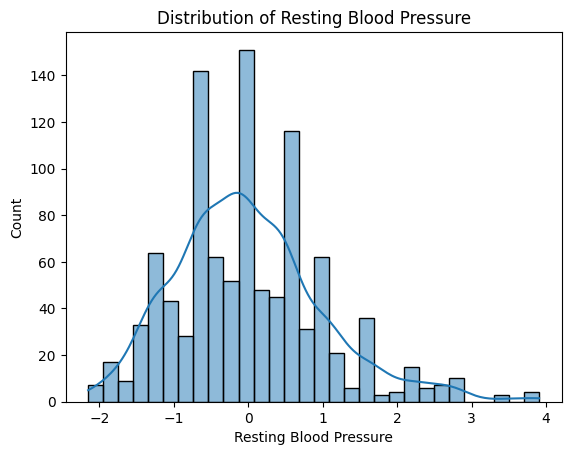

In [ ]:
sns.histplot(data['trestbps'], kde=True, bins = 30)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show()

Plots the distribution of cholesterol levels using a histogram.


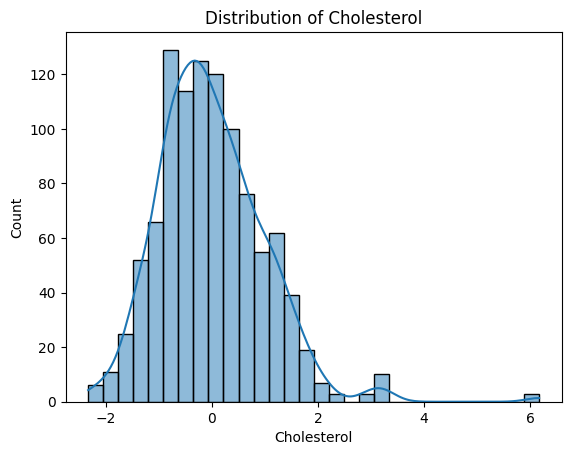

In [ ]:
sns.histplot(data['chol'], kde=True, bins = 30)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

Displays a correlation matrix heatmap showing the relationships between different features.

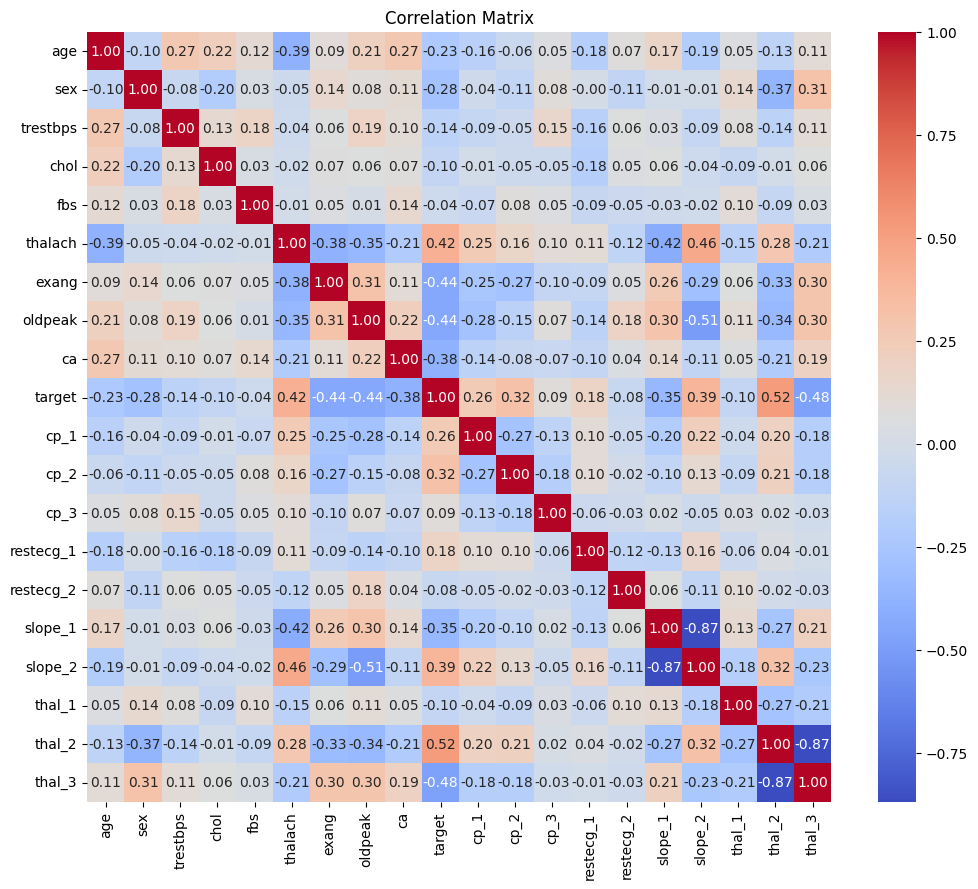

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Creates a box plot showing the relationship between age and heart disease presence.

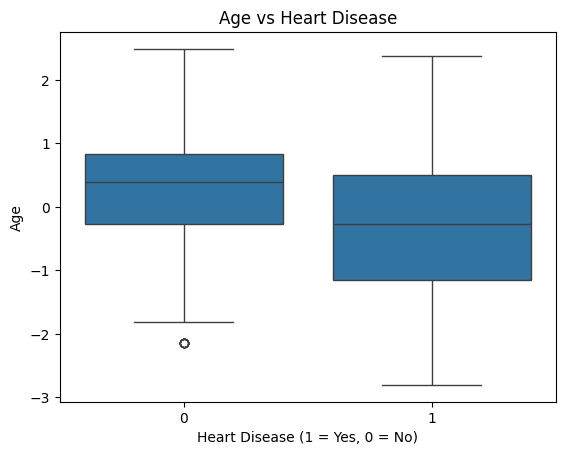

In [ ]:
# Box plot for Age
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

Creates a box plot showing the relationship between cholesterol and heart disease presence.

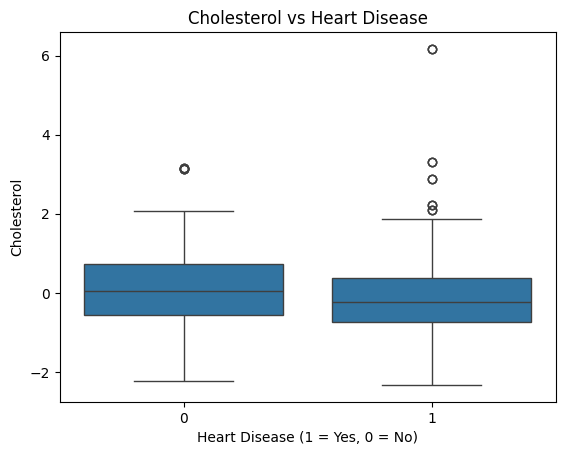

In [ ]:
# Box plot for Cholesterol
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol')
plt.show()

Uses a pair plot to visualize relationships between age, cholesterol, heart rate, and ST depression.

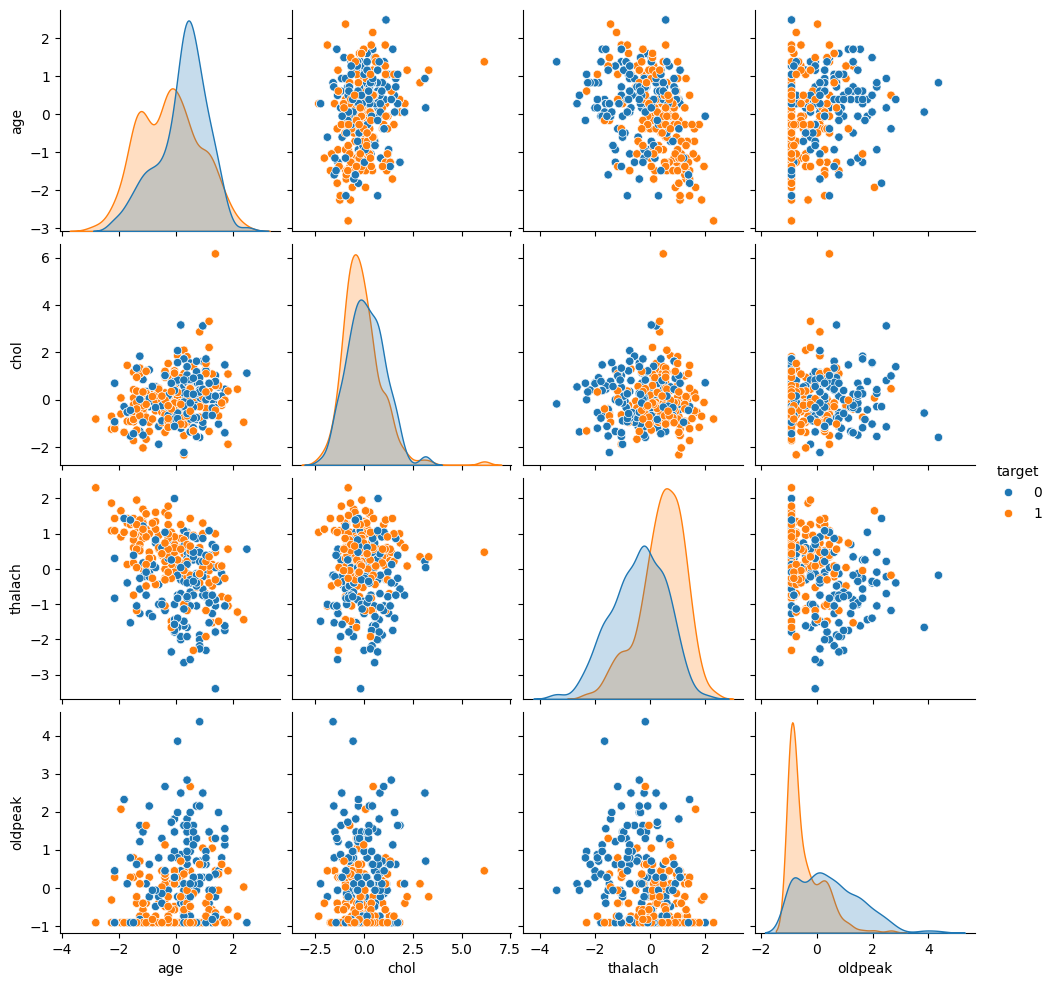

In [ ]:
sns.pairplot(data, hue='target', vars=['age', 'chol', 'thalach', 'oldpeak'])
plt.show()

Splits the dataset into training (80%) and testing (20%) sets for model evaluation.

In [ ]:
# Separate features (X) and target (y)
X = data.drop('target', axis=1)  # Drop the 'target' column to get X
y = data['target']  # The 'target' column as y

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape)

(820, 19) (205, 19)


In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

target
1    0.515854
0    0.484146
Name: proportion, dtype: float64
target
1    0.502439
0    0.497561
Name: proportion, dtype: float64


Initializes and trains a logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

 Evaluates the logistic regression model and prints its accuracy, precision, recall, and F1 score.

 Displays the confusion matrix for the logistic regression model using a heatmap.

Logistic Regression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



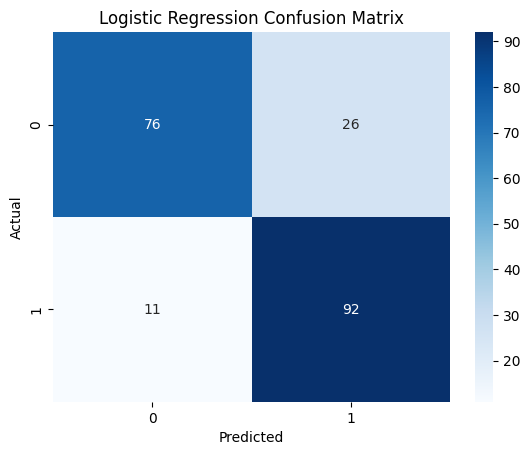

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Plots the ROC curve for the logistic regression model to visualize its performance.

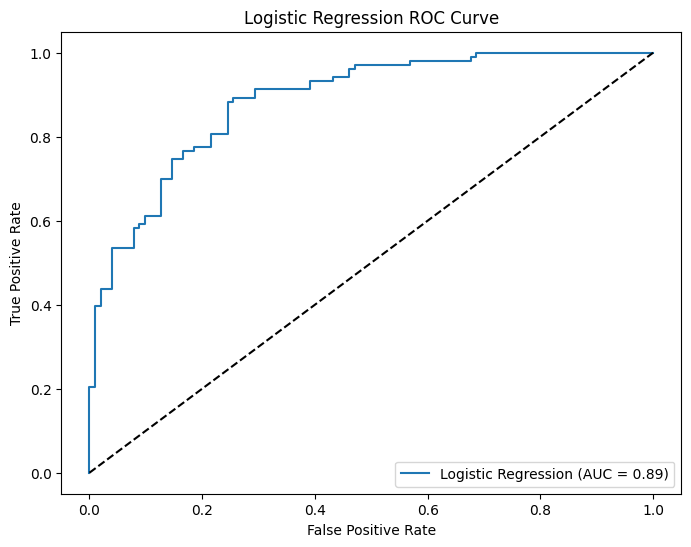

In [ ]:
# Predict probabilities
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

Initializes and trains a decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluates the decision tree model, achieving a perfect accuracy of 100%.

Displays the confusion matrix for the decision tree model using a heatmap.

Decision Tree Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



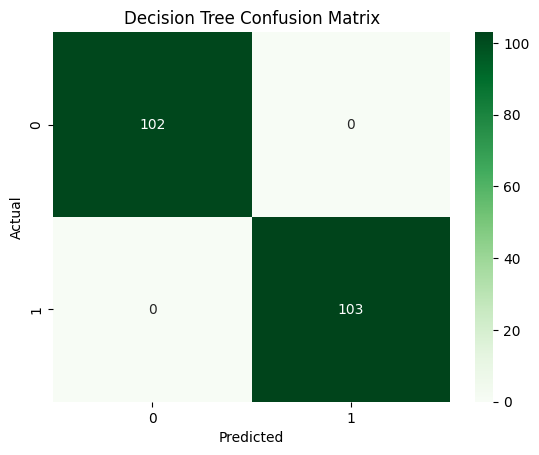

In [ ]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Plots the ROC curve for the decision tree model.

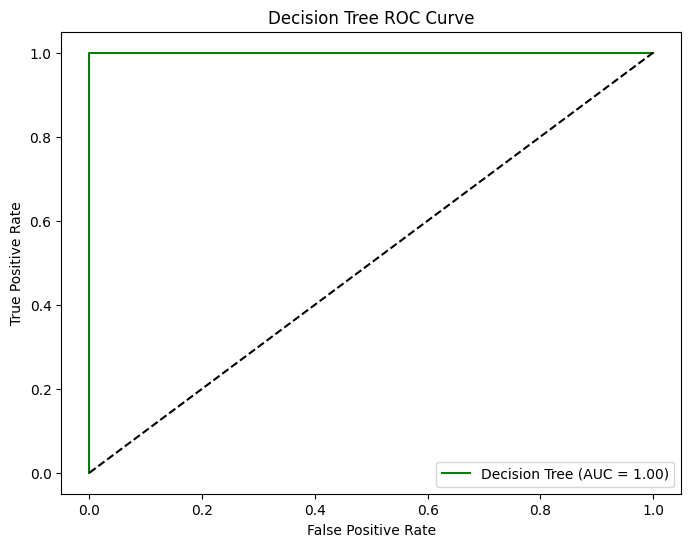

In [ ]:
# Predict probabilities
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

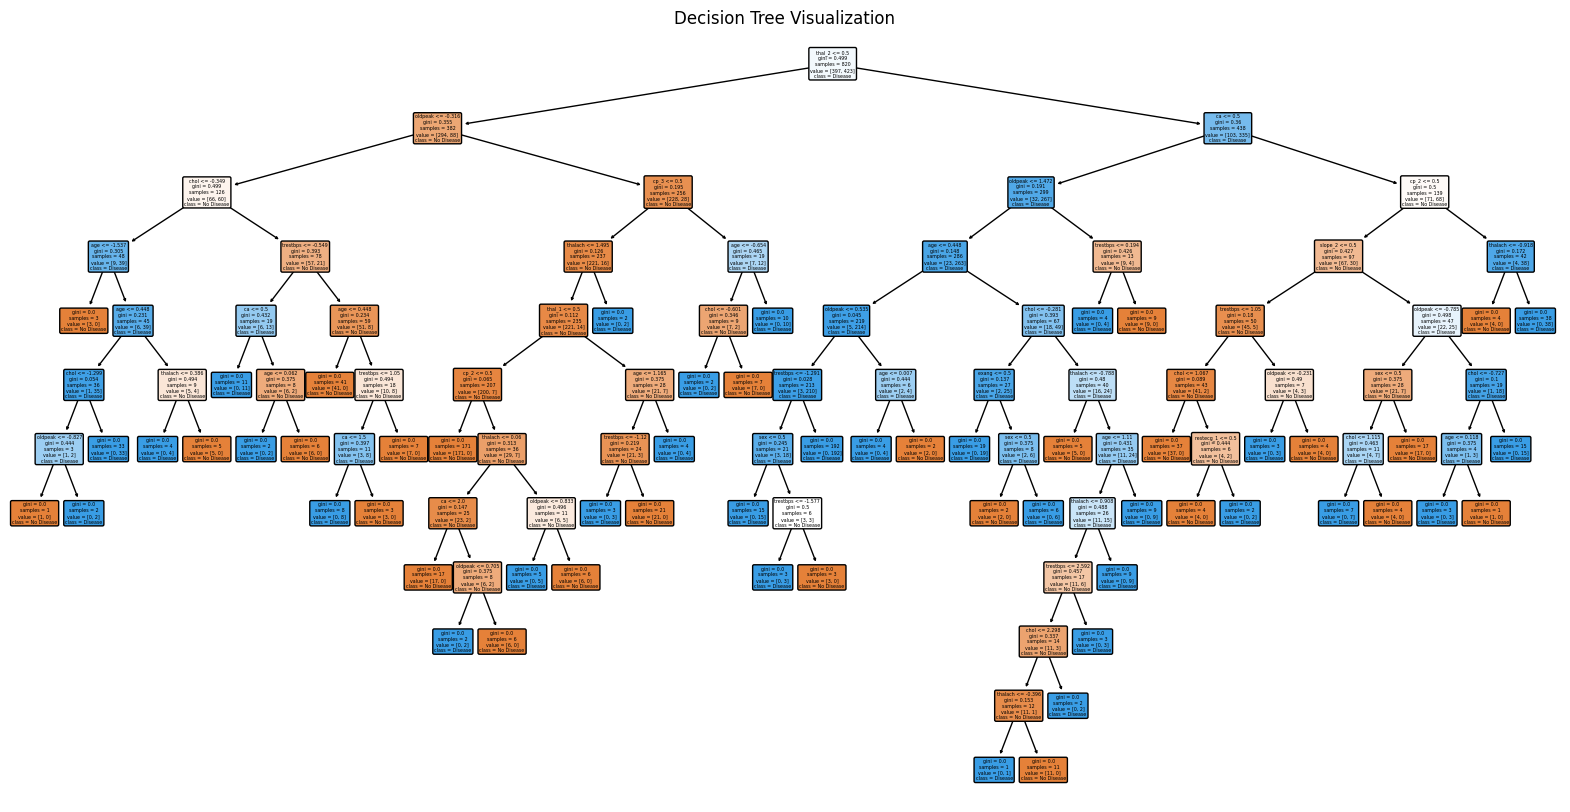

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Compare AUC
print(f"Logistic Regression AUC: {roc_auc_lr:.2f}")
print(f"Decision Tree AUC: {roc_auc_dt:.2f}")

Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 1.00
Logistic Regression AUC: 0.89
Decision Tree AUC: 1.00


In [ ]:
# Logistic Regression with best params
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print(f'Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best_lr):.2f}')

# Decision Tree with best params
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print(f'Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best_dt):.2f}')

Best Logistic Regression Accuracy: 0.82
Best Decision Tree Accuracy: 0.97


In [ ]:
import joblib

# Save Logistic Regression model
joblib.dump(best_lr, 'best_logistic_regression_model.pkl')

# Save Decision Tree model
joblib.dump(best_dt, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']

In [ ]:
# Load Logistic Regression model
loaded_lr = joblib.load('best_logistic_regression_model.pkl')

# Load Decision Tree model
loaded_dt = joblib.load('best_decision_tree_model.pkl')